# Meteorological conditions during SSW events

In [2]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

## Definition of functions

In [3]:
def read_group(gruppe,loc):
    station = loc#ersten Buchstaben bitte bitte groß schreiben
    
    if loc=='Rio':
        timestart = '2008-02-01'
        timeend = '2019-12-31'
    elif loc == 'Col':
        timestart =  '2004-08-01'
        timeend =  '2019-03-06'
    elif loc=='CMA':
        timestart = '2002-01-01'
        timeend = '2018-12-31'
    elif loc=='Dav':
        timestart = '2005-01-01'
        timeend ='2019-12-31'
    elif loc=='Kir':
        timestart = '1999-08-01'
        timeend ='2019-12-31'
    
    infiles = f'{root_path}{station}/Meteor_radar_{station}_GW_*.h5'
    ds = xr.open_mfdataset(infiles, concat_dim = 'phony_dim_6', group = gruppe, combine='nested', parallel = True)
    ds = ds.rename({'phony_dim_6': 'time', 'phony_dim_7': 'alt'})
    ds['alt'] = alt
    ds['alt'].attrs['units'] = 'km'
    # change time range according to meteor radar station
    ds['time'] = pd.date_range(start = timestart, end = timeend, periods = ds.time.shape[0]) 
    return ds

In [4]:
def read_var(gruppe, var):
        varout = gruppe[var]
        return varout

In [5]:
def hwind(u,v):
    return np.sqrt(u**2+v**2)

In [6]:
def time_mean(step,var):
    return var.resample(time='1'+step).mean('time') #Immer nur D oder M oder H oder Y eintragen! Mit Anführungszeichen!

In [7]:
def anomalie(step,var):
    string = "time."+step   
    climatology = var.groupby(string).mean("time")
    anomalies = var.groupby(string) - climatology
    
    return anomalies

In [8]:
def grav_waves(wind_component,loc): # Beides muss schon als String reingegeben werden! 
    ds = read_group('wind',loc)
    gw = read_var(ds,wind_component) - read_var(ds,wind_component+'_fil')
    return gw

In [9]:
def kin_energy_grav_waves(loc):
    kin_energy = 0.5*((grav_waves('u',loc))**2 + (grav_waves('v',loc))**2)
    return kin_energy

#### Superposed Epoch Analysis

In [10]:
def sea(days_period,station,var):
    df_dates = pd.read_csv('ssw_dates_displ_'+station+'.csv') # you can load SSWs from a csv file like attached
    dates = df_dates.set_index('BeginDate')

    xa_ls = []
    max_lag = days_period
    for il, days in enumerate(range(-max_lag,max_lag+1)):  
        sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days)+' days')
        mask = np.in1d(var.time.dt.floor('1D'),sel_dates)
        comp_m = var.sel(time = mask).mean('time')
        xa_ls.append(comp_m)
   
    xa_comp = xr.concat(xa_ls, dim = 'days')
    xa_comp['days'] = range(-max_lag, max_lag+1)

    # print(xa_comp)
    return xa_comp

## SSW-Events

In [11]:
ssw_events = ['2008-02-21','2009-01-23','2010-01-26','2010-02-09','2010-03-24','2011-02-01','2011-03-25','2012-01-17','2013-01-06','2013-01-17','2014-03-31','2015-01-05','2016-03-16','2018-02-12']

In [12]:
alt = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, \
       106, 108, 110, 112, 114, 116, 118, 120]
root_path = '/home/gemeinsam_tmp/UA_students/data/'
#xr.open_dataset( '/home/gemeinsam_tmp/UA_students/data/Kir/Meteor_radar_Kir_GW_201912.h5', group='info')['day']

## Measurements

### Wind

#### Collm

In [13]:
ds_col = read_group('wind','Col')
u_col = read_var(ds_col,'u')
v_col = read_var(ds_col,'v')

u_col_anomalie = anomalie('day',u_col)
# u_col_anomalie.plot(x='time',robust=True)

v_col_anomalie = anomalie('day',v_col)

sea_u_col = sea(30,'Col',u_col)
sea_u_col_anomalie = sea(30,'Col',u_col_anomalie)

sea_v_col = sea(30,'Col',v_col)
sea_v_col_anomalie = sea(30,'Col',v_col_anomalie)

##### Climatology of u-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


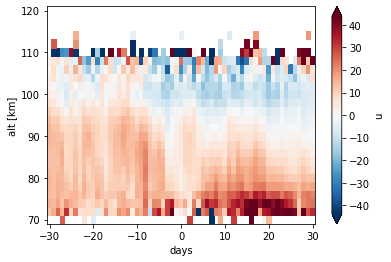

In [14]:
sea_u_col.plot(x='days',robust=True)

##### Anomalies of u-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


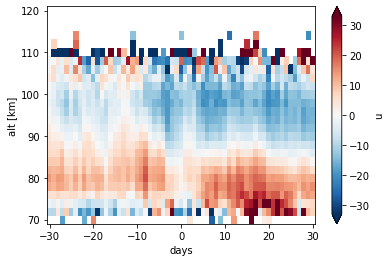

In [15]:
sea_u_col_anomalie.plot(x='days',robust=True)

##### Climatology of v-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


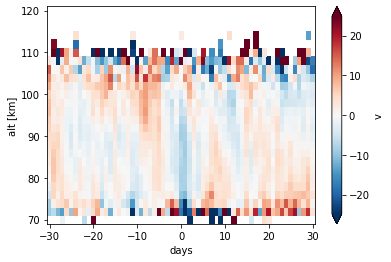

In [16]:
sea_v_col.plot(x='days',robust=True)

##### Anomalies of v-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


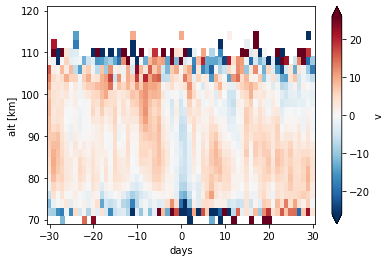

In [17]:
sea_v_col_anomalie.plot(x='days',robust=True)

#### CMA CMOR (Canada)

In [18]:
ds_cma = read_group('wind','CMA')
u_cma = read_var(ds_cma,'u')  
v_cma = read_var(ds_cma,'v')

u_cma_anomalie = anomalie('day',u_cma)
# u_cma_anomalie.plot(x='time',robust=True)

v_cma_anomalie = anomalie('day',v_cma)

sea_u_cma = sea(30,'CMA',u_cma)
sea_u_cma_anomalie = sea(30,'CMA',u_cma_anomalie)

sea_v_cma = sea(30,'CMA',v_cma)
sea_v_cma_anomalie = sea(30,'CMA',v_cma_anomalie)

##### Climatology of u-component

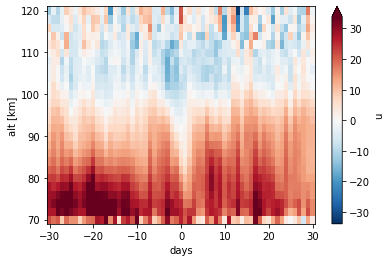

In [19]:
sea_u_cma.plot(x='days',robust=True)

##### Anomalies of u-component

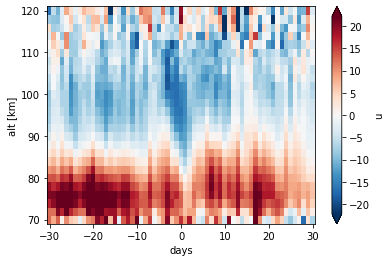

In [20]:
sea_u_cma_anomalie.plot(x='days',robust=True)

##### Climatology of v-component

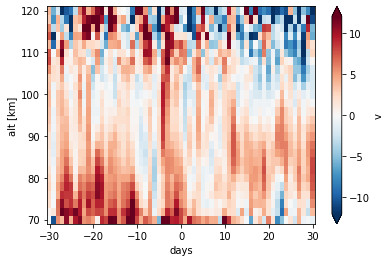

In [21]:
sea_v_cma.plot(x='days',robust=True)

##### Anomalies of v-component

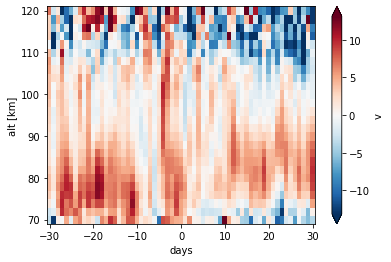

In [22]:
sea_v_cma_anomalie.plot(x='days',robust=True)

#### Davis

In [23]:
ds_dav = read_group('wind','Dav')
u_dav = read_var(ds_dav,'u')  
v_dav = read_var(ds_dav,'v')

u_dav_anomalie = anomalie('day',u_dav)
# u_rio_anomalie.plot(x='time',robust=True)

v_dav_anomalie = anomalie('day',v_dav)

sea_u_dav = sea(30,'Dav',u_dav)
sea_u_dav_anomalie = sea(30,'Dav',u_dav_anomalie)

sea_v_dav = sea(30,'Dav',v_dav)
sea_v_dav_anomalie = sea(30,'Dav',v_dav_anomalie)

##### Climatology of u-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


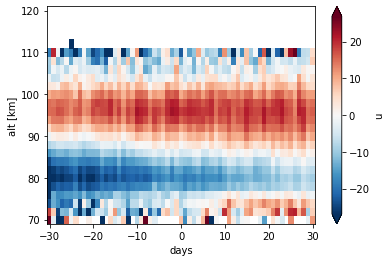

In [24]:
sea_u_dav.plot(x='days',robust=True)

##### Anomalies of u-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


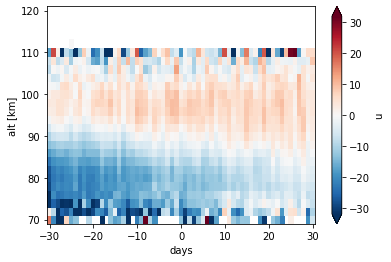

In [25]:
sea_u_dav_anomalie.plot(x='days',robust=True)

##### Climatology of v-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


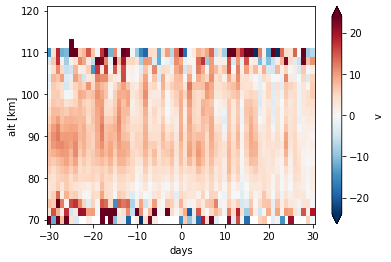

In [26]:
sea_v_dav.plot(x='days',robust=True)

##### Anomalies of v-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


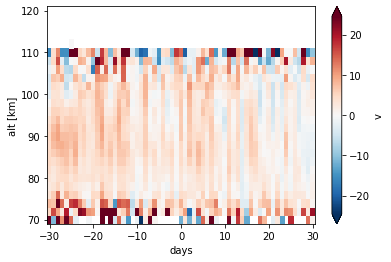

In [27]:
sea_v_dav_anomalie.plot(x='days',robust=True)

#### Rio Grande

In [28]:
ds_rio = read_group('wind','Rio')
u_rio = read_var(ds_rio,'u')  
v_rio = read_var(ds_rio,'v')

u_rio_anomalie = anomalie('day',u_rio)
# u_rio_anomalie.plot(x='time',robust=True)

v_rio_anomalie = anomalie('day',v_rio)

sea_u_rio = sea(30,'Rio',u_rio)
sea_u_rio_anomalie = sea(30,'Rio',u_rio_anomalie)

sea_v_rio = sea(30,'Rio',v_rio)
sea_v_rio_anomalie = sea(30,'Rio',v_rio_anomalie)

##### Climatology of u-component

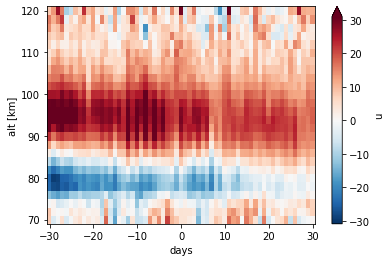

In [29]:
sea_u_rio.plot(x='days',robust=True)

##### Anomalies of u-component

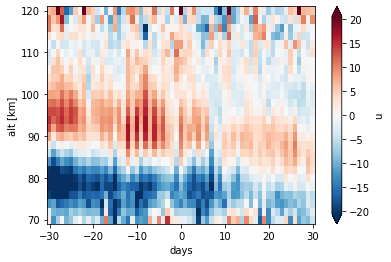

In [30]:
sea_u_rio_anomalie.plot(x='days',robust=True)

##### Climatology of v-component

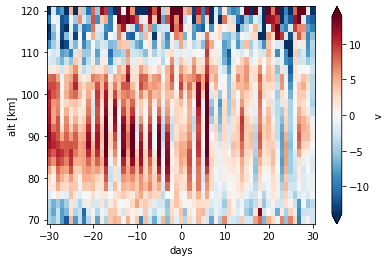

In [31]:
sea_v_rio.plot(x='days',robust=True)

##### Anomalies of v-component

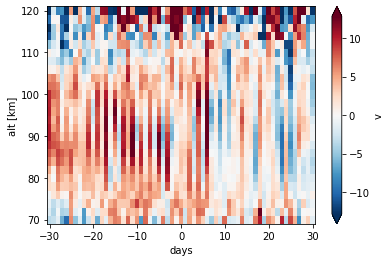

In [32]:
sea_v_rio_anomalie.plot(x='days',robust=True)

#### Kiruna (Sweden)

In [33]:
ds_kir = read_group('wind','Kir')
u_kir = read_var(ds_kir,'u')  
v_kir = read_var(ds_kir,'v')

u_kir_anomalie = anomalie('day',u_kir)
# u_rio_anomalie.plot(x='time',robust=True)

v_kir_anomalie = anomalie('day',v_kir)

sea_u_kir = sea(30,'Kir',u_kir)
sea_u_kir_anomalie = sea(30,'Kir',u_kir_anomalie)

sea_v_kir = sea(30,'Kir',v_kir)
sea_v_kir_anomalie = sea(30,'Kir',v_kir_anomalie)

##### Climatology of u-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


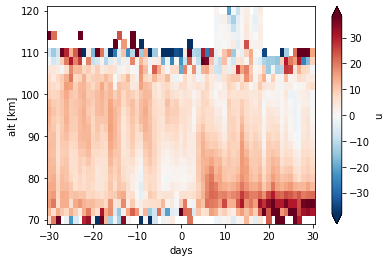

In [34]:
sea_u_kir.plot(x='days',robust=True)

##### Anomalies of u-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


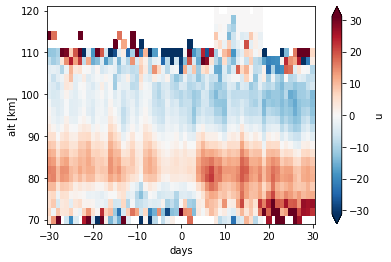

In [35]:
sea_u_kir_anomalie.plot(x='days',robust=True)

##### Climatology of v-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


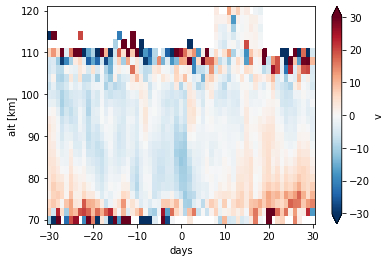

In [36]:
sea_v_kir.plot(x='days',robust=True)

##### Anomalies of v-component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


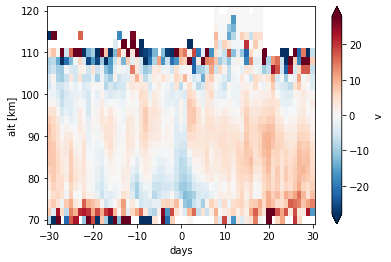

In [37]:
sea_v_kir_anomalie.plot(x='days',robust=True)

### Gravity waves

#### Collm

In [38]:
gw_u_col = grav_waves('u','Col')
gw_v_col = grav_waves('v','Col')
gw_total_energy_col = kin_energy_grav_waves('Col')

sea_gw_u_col = sea(60,'Col',gw_u_col)
sea_gw_v_col = sea(60,'Col',gw_v_col)
sea_gw_total_energy_col = sea(60,'Col',gw_total_energy_col)

##### Gravity waves zonal component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


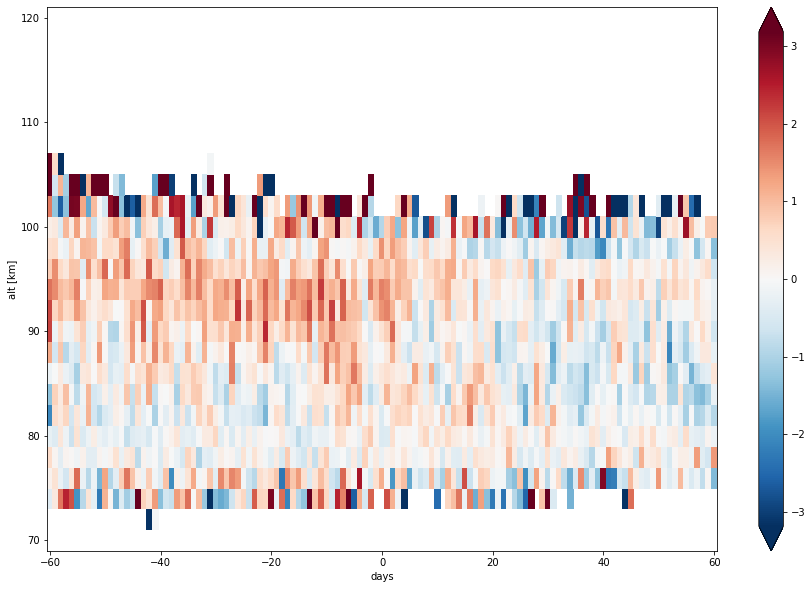

In [39]:
sea_gw_u_col.plot(x='days',size=10,robust=True)

##### Gravity waves meridional component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


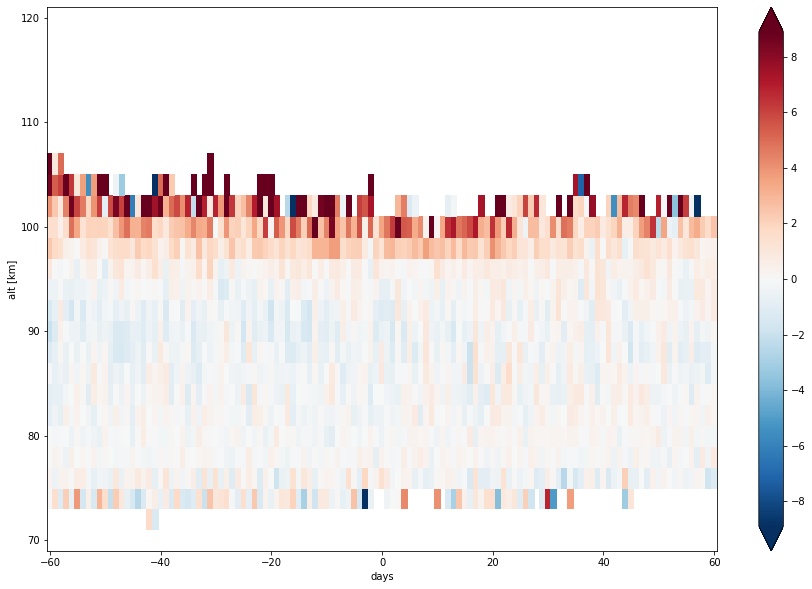

In [40]:
sea_gw_v_col.plot(x='days',size=10,robust=True)

##### Total kinetic energy of gravity waves

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


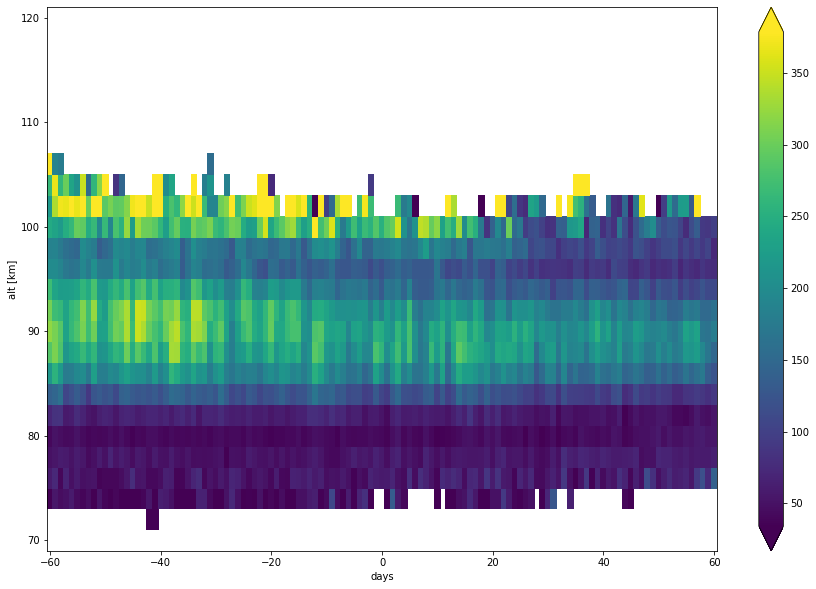

In [41]:
sea_gw_total_energy_col.plot(x='days',size=10,robust=True)

Observation: After the onset of the SSW the kinetic enrgy of the gravity waves shows a slight decrease. This would mean that around and after SSW's less or at least weaker gravity waves are present in the Mesosphere. Especially the zonal component shows this decrease as well.

Notiz: Vielleicht aber nur die Energie zeigen und nicht noch die einzelnen Komponenten - das wird sonst zu viel...

#### Rio Grande

In [42]:
gw_u_rio = grav_waves('u','Rio')
gw_v_rio = grav_waves('v','Rio')
gw_total_energy_rio = kin_energy_grav_waves('Rio')

sea_gw_u_rio = sea(60,'Rio',gw_u_rio)
sea_gw_v_rio = sea(60,'Rio',gw_v_rio)
sea_gw_total_energy_rio = sea(60,'Rio',gw_total_energy_rio)

##### Gravity waves zonal component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


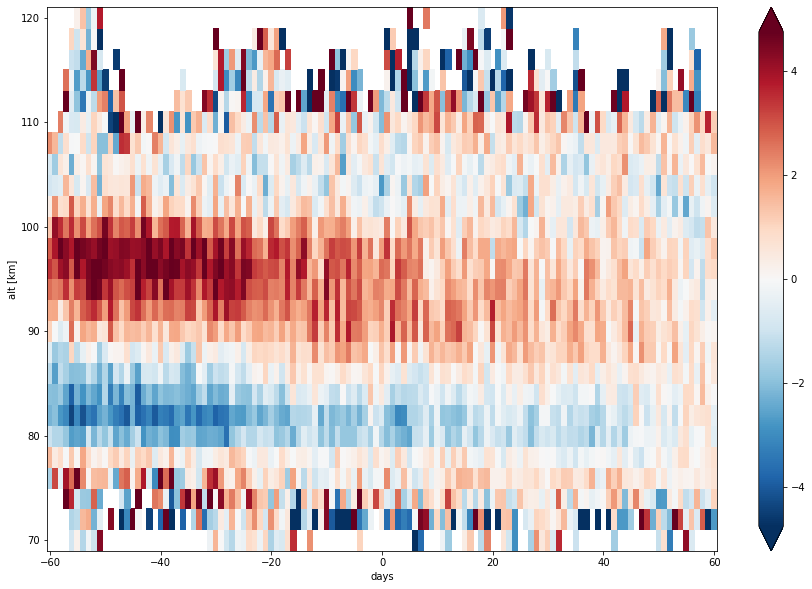

In [43]:
sea_gw_u_rio.plot(x='days',size=10,robust=True)

##### Gravity waves meridional component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


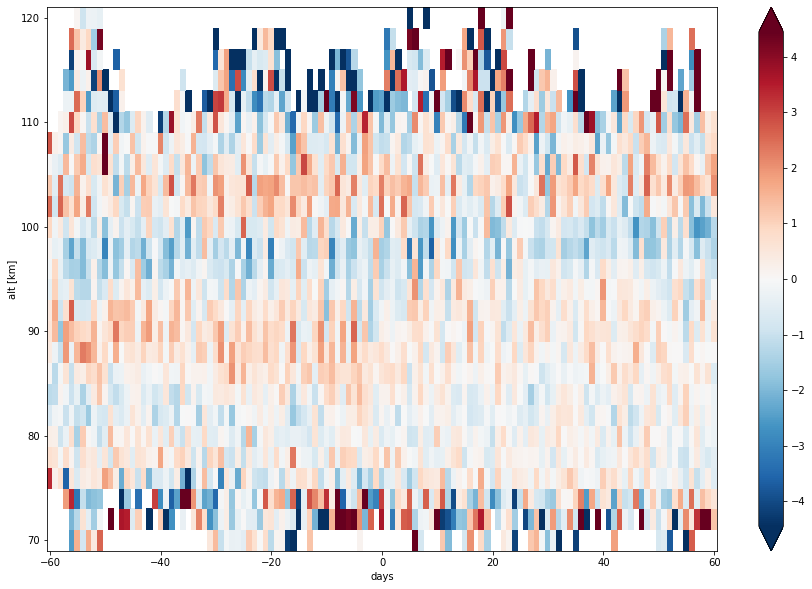

In [44]:
sea_gw_v_rio.plot(x='days',size=10,robust=True)

##### Total kinetic energy of gravity waves

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


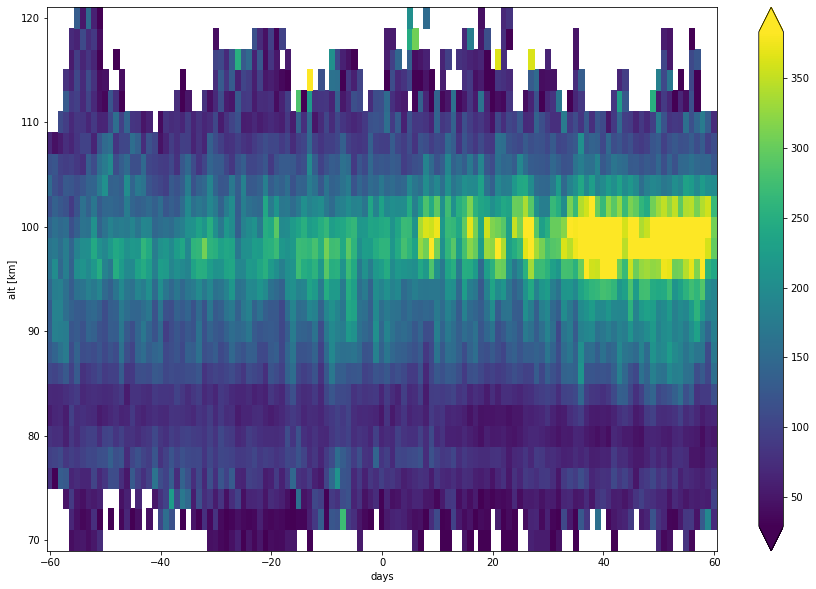

In [45]:
sea_gw_total_energy_rio.plot(x='days',size=10,robust=True)

#### CMA CMOR (Canada)

In [46]:
gw_u_cma = grav_waves('u','CMA')
gw_v_cma = grav_waves('v','CMA')
gw_total_energy_cma = kin_energy_grav_waves('CMA')

sea_gw_u_cma = sea(60,'CMA',gw_u_cma)
sea_gw_v_cma = sea(60,'CMA',gw_v_cma)
sea_gw_total_energy_cma = sea(60,'CMA',gw_total_energy_cma)

##### Gravity waves zonal component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


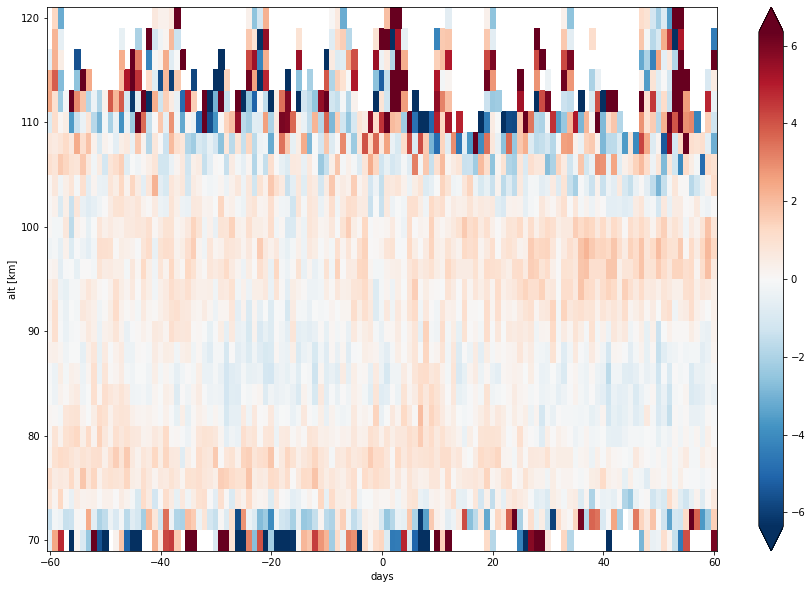

In [47]:
sea_gw_u_cma.plot(x='days',size=10,robust=True)

##### Gravity waves meridional component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


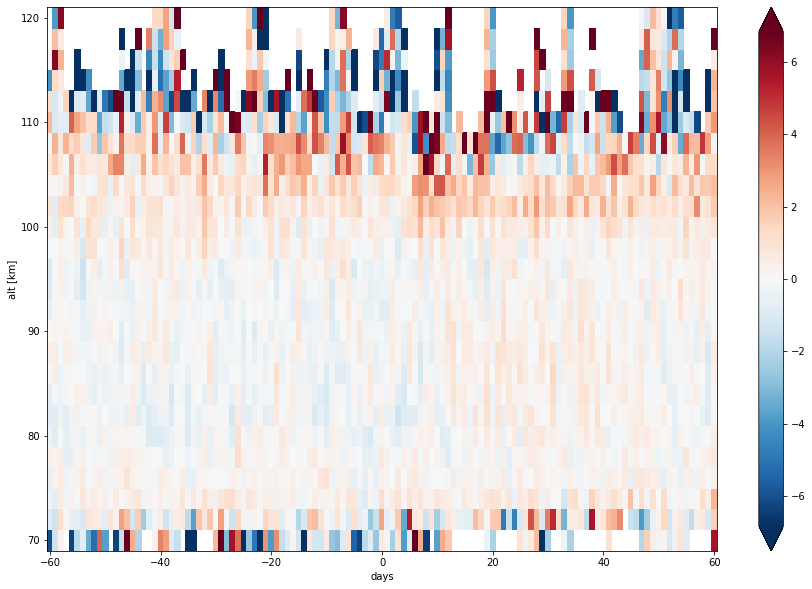

In [48]:
sea_gw_v_cma.plot(x='days',size=10,robust=True)

##### Total kinetic energy of gravity waves

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


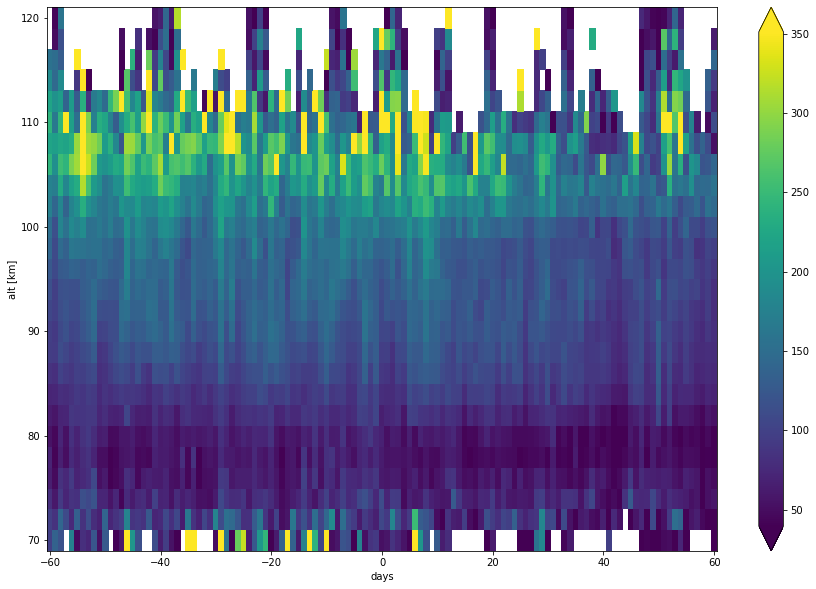

In [49]:
sea_gw_total_energy_cma.plot(x='days',size=10,robust=True)

#### Davis

In [50]:
gw_u_dav = grav_waves('u','Dav')
gw_v_dav = grav_waves('v','Dav')
gw_total_energy_dav = kin_energy_grav_waves('Dav')

sea_gw_u_dav = sea(60,'Dav',gw_u_dav)
sea_gw_v_dav = sea(60,'Dav',gw_v_dav)
sea_gw_total_energy_dav = sea(60,'Dav',gw_total_energy_dav)

##### Gravity waves zonal component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


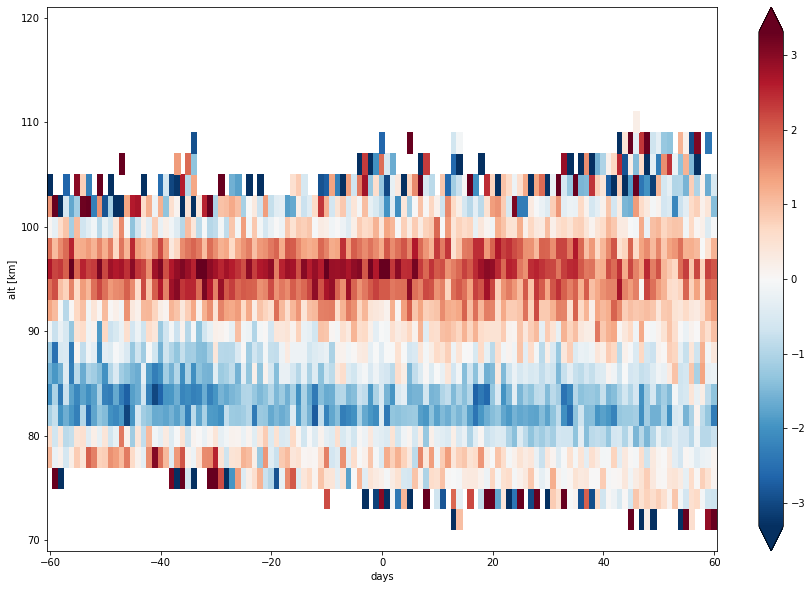

In [51]:
sea_gw_u_dav.plot(x='days',size=10,robust=True)

##### Gravity waves meridional component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


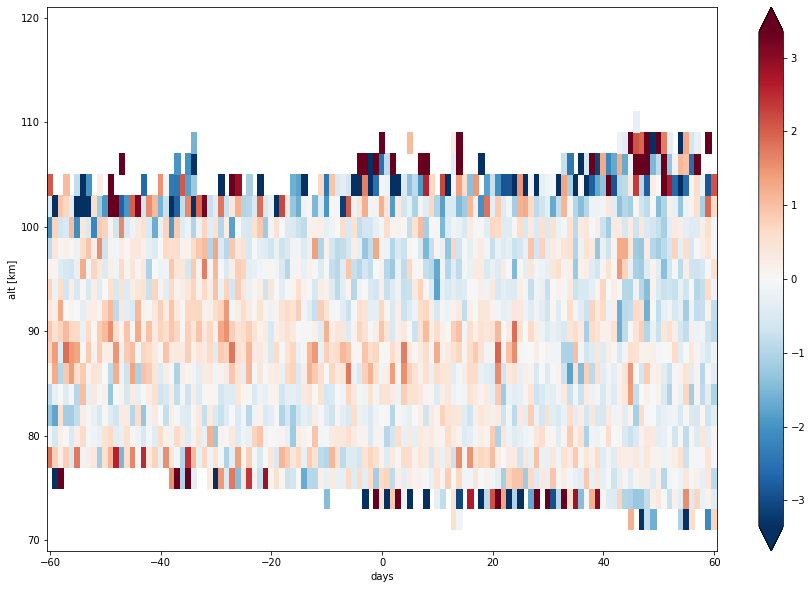

In [52]:
sea_gw_v_dav.plot(x='days',size=10,robust=True)

##### Total kinetic energy of gravity waves

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


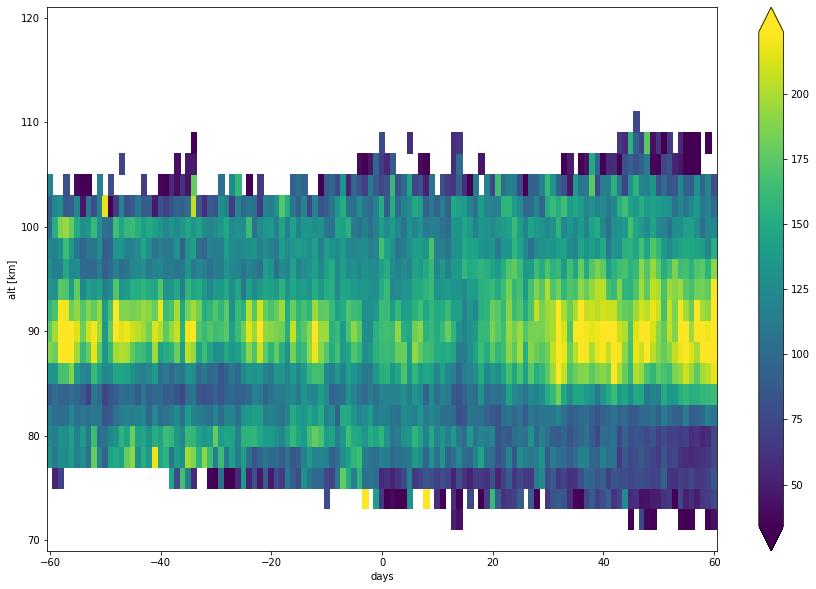

In [53]:
sea_gw_total_energy_dav.plot(x='days',size=10,robust=True)

#### Kiruna (Sweden)

In [54]:
gw_u_kir = grav_waves('u','Kir')
gw_v_kir = grav_waves('v','Kir')
gw_total_energy_kir = kin_energy_grav_waves('Kir')

sea_gw_u_kir = sea(60,'Kir',gw_u_kir)
sea_gw_v_kir = sea(60,'Kir',gw_v_kir)
sea_gw_total_energy_kir = sea(60,'Kir',gw_total_energy_kir)

##### Gravity waves zonal component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


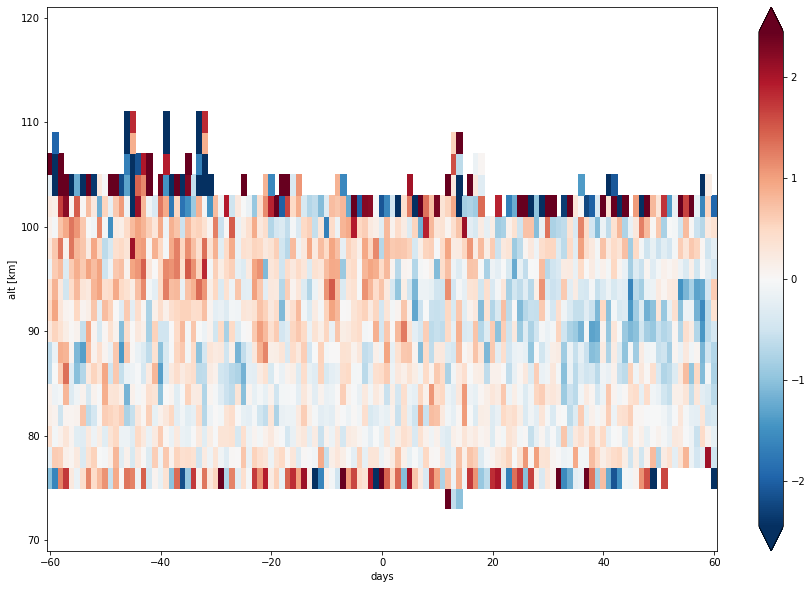

In [55]:
sea_gw_u_kir.plot(x='days',size=10,robust=True)

##### Gravity waves meridional component

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


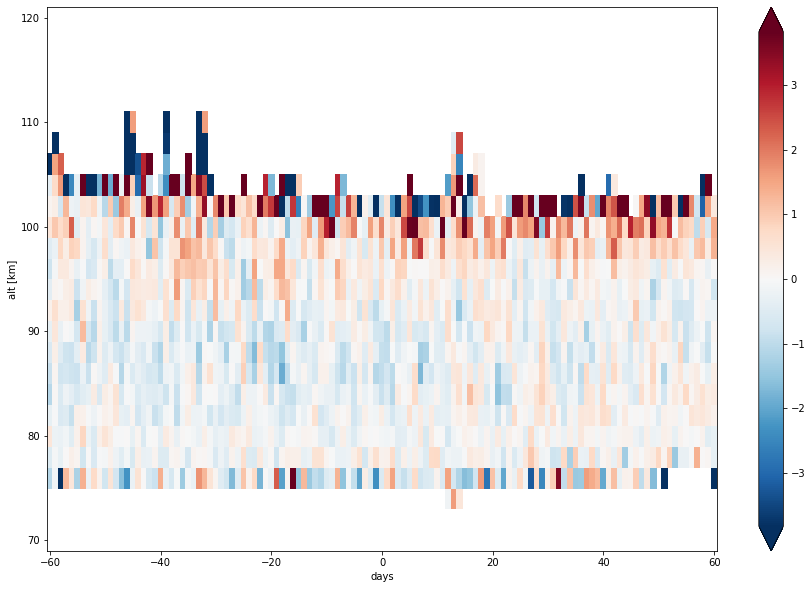

In [56]:
sea_gw_v_kir.plot(x='days',size=10,robust=True)

##### Total kinetic energy of gravity waves

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


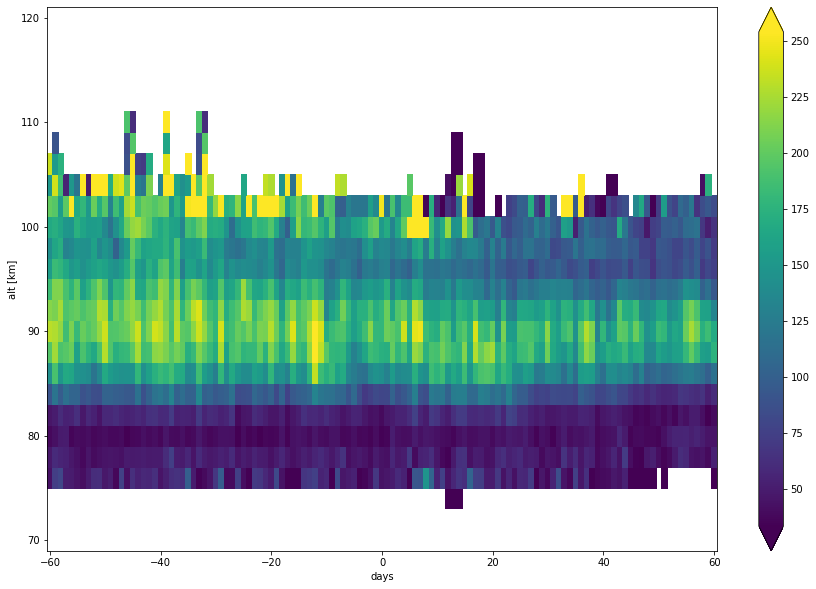

In [57]:
sea_gw_total_energy_kir.plot(x='days',size=10,robust=True)

In [41]:
v_rio_anomalie = anomalie('hour',v_rio)
#v_rio_anomalie.plot(x='time',robust=True)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 31 times more chunks
  return self.array[key]


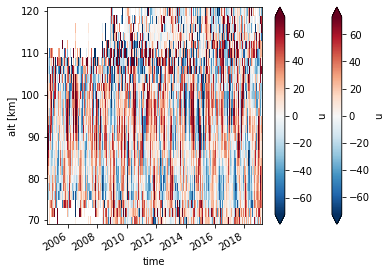

In [42]:
u_rio.plot(x='time', robust = True)

u_col.plot(x='time', robust = True)

In [43]:
#v_rio.plot(x='time')

In [44]:
#u_rio.sel(time = time_sel).plot(x='time')
#u_rio.sel(time=slice('2008-05-21', '2008-06-21')).plot(x='time')

### Superposed Epoch Analysis

<xarray.DataArray 'u' (days: 61, alt: 26)>
dask.array<concatenate, shape=(61, 26), dtype=float64, chunksize=(1, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * days     (days) int64 -30 -29 -28 -27 -26 -25 -24 ... 24 25 26 27 28 29 30


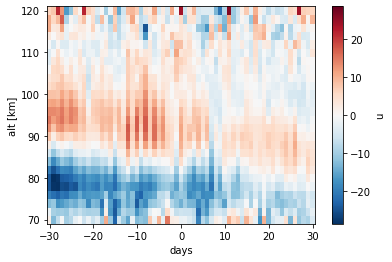

In [45]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv') # you can load SSWs from a csv file like attached
dates = df_dates.set_index('BeginDate')

xa_ls = []
max_lag=30
for il, days in enumerate(range(-max_lag,max_lag+1)):  
    sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days)+' days')
    mask = np.in1d(u_rio_anomalie.time.dt.floor('1D'),sel_dates)
    comp_m = u_rio_anomalie.sel(time = mask).mean('time')
    xa_ls.append(comp_m)
   
xa_comp = xr.concat(xa_ls, dim = 'days')
xa_comp['days'] = range(-max_lag, max_lag+1)

print(xa_comp)
xa_comp.plot(x='days')

<xarray.DataArray 'u' (days: 61, alt: 26)>
dask.array<concatenate, shape=(61, 26), dtype=float64, chunksize=(1, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * days     (days) int64 -30 -29 -28 -27 -26 -25 -24 ... 24 25 26 27 28 29 30


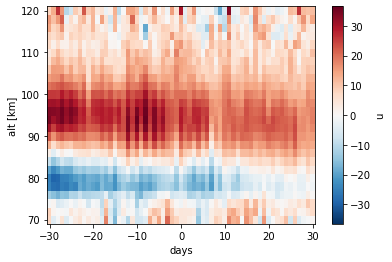

In [46]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv') # you can load SSWs from a csv file like attached
dates = df_dates.set_index('BeginDate')

xa_ls = []
max_lag=30
for il, days in enumerate(range(-max_lag,max_lag+1)):  
    sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days)+' days')
    mask = np.in1d(u_rio.time.dt.floor('1D'),sel_dates)
    comp_m = u_rio.sel(time = mask).mean('time')
    xa_ls.append(comp_m)
   
xa_comp = xr.concat(xa_ls, dim = 'days')
xa_comp['days'] = range(-max_lag, max_lag+1)

print(xa_comp)
xa_comp.plot(x='days')

<xarray.DataArray 'u' (days: 121, alt: 26)>
dask.array<concatenate, shape=(121, 26), dtype=float64, chunksize=(1, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * days     (days) int64 -60 -59 -58 -57 -56 -55 -54 ... 54 55 56 57 58 59 60


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


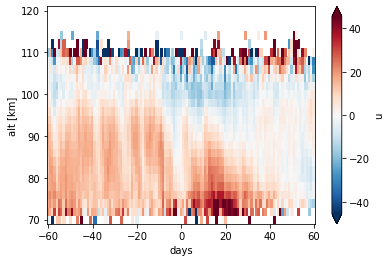

In [47]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv') # you can load SSWs from a csv file like attached
dates = df_dates.set_index('BeginDate')

xa_ls = []
max_lag=60
for il, days in enumerate(range(-max_lag,max_lag+1)):  
    sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days)+' days')
    mask = np.in1d(u_col.time.dt.floor('1D'),sel_dates)
    comp_m = u_col.sel(time = mask).mean('time')
    xa_ls.append(comp_m)
   
xa_comp = xr.concat(xa_ls, dim = 'days')
xa_comp['days'] = range(-max_lag, max_lag+1)

print(xa_comp)
xa_comp.plot(x='days',robust = True)

<xarray.DataArray 'u' (days: 121, alt: 26)>
dask.array<concatenate, shape=(121, 26), dtype=float64, chunksize=(1, 26), chunktype=numpy.ndarray>
Coordinates:
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * days     (days) int64 -60 -59 -58 -57 -56 -55 -54 ... 54 55 56 57 58 59 60


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


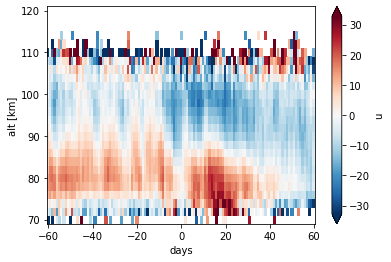

In [48]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv') # you can load SSWs from a csv file like attached
dates = df_dates.set_index('BeginDate')

xa_ls = []
max_lag=60
for il, days in enumerate(range(-max_lag,max_lag+1)):  
    sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days)+' days')
    mask = np.in1d(u_col_anomalie.time.dt.floor('1D'),sel_dates)
    comp_m = u_col_anomalie.sel(time = mask).mean('time')
    xa_ls.append(comp_m)
   
xa_comp = xr.concat(xa_ls, dim = 'days')
xa_comp['days'] = range(-max_lag, max_lag+1)

print(xa_comp)
xa_comp.plot(x='days',robust = True)

In [49]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv') # you can load SSWs from a csv file like attached

xa_ls = []
max_lag=30
for il, lag in enumerate(range(-max_lag,max_lag+1)):
  dates = df_dates.set_index('BeginDate')
  dates = dates.index + pd.Timedelta(str(lag)+' days')
  print(dates)
  u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates)
  comp = u_rio_anomalie_sel.groupby('time.month') - clim
  comp_m = comp.mean('time')
xa_ls.append(comp_m)
xa_comp = xr.concat(xa_ls, dim = 'lag')
xa_comp['lag'] = range(-max_lag, max_lag+1)

TypeError: unsupported operand type(s) for +: 'Timedelta' and 'str'

In [ ]:
df_dates = pd.read_csv('ssw_dates_displ.csv') # you can load SSWs from a csv file like attached

xa_ls = []
max_lag=30
for il, lag in enumerate(range(-max_lag,max_lag+1)):
  dates = df_dates.set_index('BeginDate')
  dates = pd.to_datetime(dates.index) + pd.Timedelta(str(lag)+' days')
  #dates= dates.strftime("%Y-%m-%d")
  print(dates)
  u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates)
  comp = u_rio_anomalie_sel.groupby('time.month') #- clim
  comp_m = comp.mean('time')
xa_ls.append(comp_m)
xa_comp = xr.concat(xa_ls, dim = 'lag')
xa_comp['lag'] = range(-max_lag, max_lag+1)

In [ ]:
df_dates = pd.read_csv('ssw_dates_displ.csv') # you can load SSWs from a csv file like attached

xa_ls = []
max_lag=30
for il, lag in enumerate(range(-max_lag,max_lag+1)):
  dates = df_dates.set_index('BeginDate')
  dates = dates.index + str(pd.Timedelta(str(lag)+' days'))
  print(dates)
  u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates)
  comp = u_rio_anomalie_sel.groupby('time.month') #- clim
  comp_m = comp.mean('time')
xa_ls.append(comp_m)
xa_comp = xr.concat(xa_ls, dim = 'lag')
xa_comp['lag'] = range(-max_lag, max_lag+1)

In [ ]:
df_dates = pd.read_csv('ssw_dates_displ_test.csv',parse_dates=['BeginDate'],index_col=['BeginDate'],sep=',') # you can load SSWs from a csv file like attached
print(df_dates.index)

xa_ls = []
max_lag=30
u_rio_ano_sel=[]

for il, lag in enumerate(range(-max_lag,max_lag+1)):
    #dates = df_dates.set_index('BeginDate')
    #dates_neu = pd.to_datetime(df_dates.index)
    #print(dates)
    
    dates_neu = df_dates.index.shift(lag,freq='D') # + pd.Timedelta(str(lag)+' days')
    dates_neu = dates_neu.strftime("%Y-%m-%d")
    print(dates_neu)
    for i in range(0,len(dates_neu)):
        u_rio_anomalie_sel = u_rio_anomalie.sel(time = dates_neu[i])
        print(u_rio_anomalie_sel)
        #u_rio_ano_sel = xr.merge([u_rio_ano_sel, u_rio_anomalie_sel], join="exact").append(u_rio_anomalie_sel)
        u_rio_ano_sel.append(u_rio_anomalie_sel)
    comp_0 = xr.concat(u_rio_ano_sel, dim = 'lag')
    comp = comp_0.groupby('time.month') #- clim
    comp_m = comp.mean('time')
    xa_ls.append(comp_m)
    xa_comp = xr.concat(xa_ls, dim = 'lag')
    print(xa_comp)
    #xa_comp['lag'] = range(-max_lag, max_lag+1)

xa_comp.plot()



In [ ]:
print(dates)

In [ ]:
u_rio_anomalie.sel(time = '2009-01-23 -30 days +00:00:00')

In [ ]:
print(xa_comp)